## Hurricane Damage Image Classification With Transfer Learning

### Import Required Libraries and Modules

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras import Sequential,layers,applications
import tensorflow_hub as hub

### Collect Image Paths for Each Hurricane Damge Category (damage,no_damage)

In [16]:
damage=glob('damage/*.jpeg')
no_damage=glob('no_damage/*.jpeg')

### Define Classes and Corresponding Labels


In [18]:
classes={1:'damage',2:'no_damage'}

### Load and Label Images for Each Hurricane Damge Category

In [19]:
images=[]
labels=[]
for i in damage:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in no_damage:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

### Plot first few images

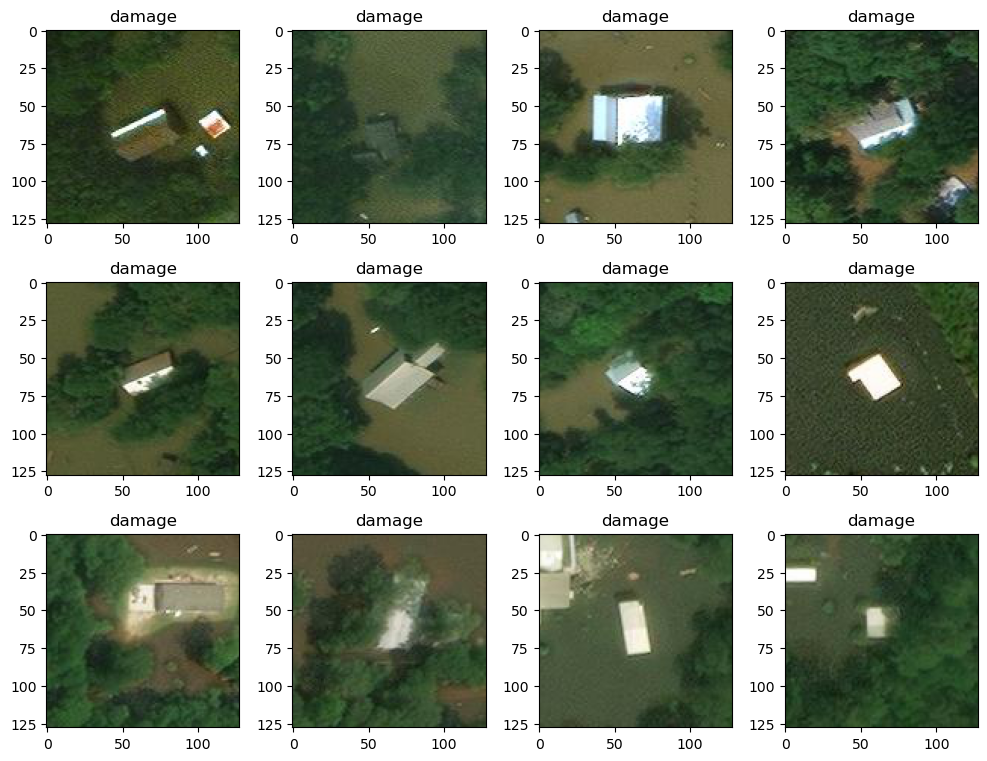

In [20]:
plt.figure(figsize=(10,10))
for  i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle the images

In [21]:
images,labels=shuffle(images,labels)

### Plot some of the image after the shuffle


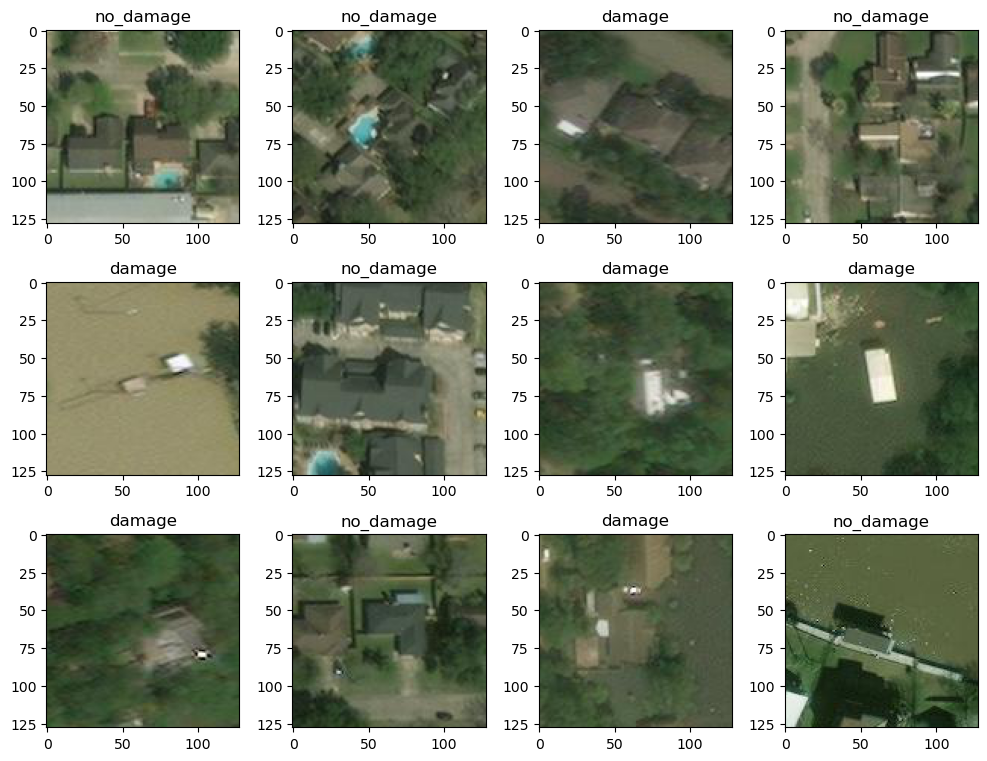

In [22]:
plt.figure(figsize=(10,10))
for  i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to EfficientNet Input Shape (224,224,3)


In [25]:
x=[]
for i in images:
    x.append(resize(i,(224,224,3)))

### Plot some of the images after resizing

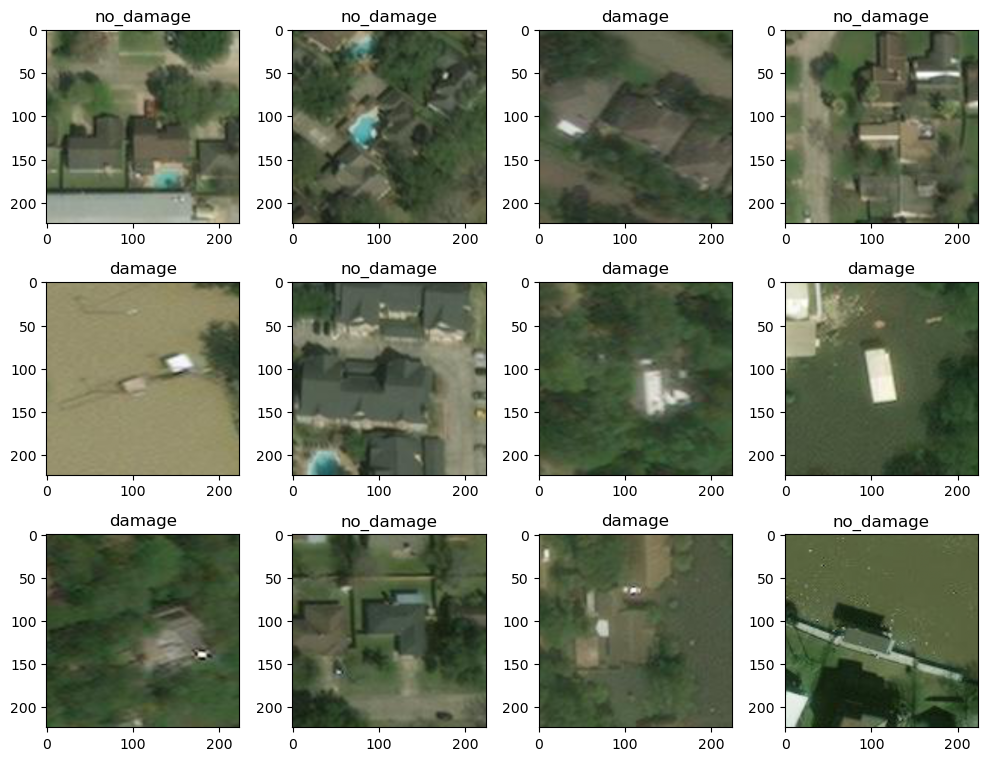

In [26]:
plt.figure(figsize=(10,10))
for  i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array


In [39]:
x=np.array(x)
y=np.array(labels)

### Split the dataset into train,test,split


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### EfficientNet Pre-trained Feature Extractor Model URL 
"https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [42]:
feature_extraction_model="https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

### Define Number of Output Classes

In [43]:
no_of_classes=3

### Instantiate EfficientNet without Top Layer as Feature Extractor


In [44]:
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extraction_model,input_shape=(224,224,3),trainable=False
)

### Build Transfer Learning Model using EfficientNet Feature Extractor


In [45]:
model=Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(44,activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(14,activation='relu'),
    layers.Dense(no_of_classes,activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_3 (Dense)             (None, 44)                56364     
                                                                 
 dropout_1 (Dropout)         (None, 44)                0         
                                                                 
 dense_4 (Dense)             (None, 14)                630       
                                                                 
 dense_5 (Dense)             (None, 3)                 45        
                                                                 
Total params: 4106603 (15.67 MB)
Trainable params: 57039 (222.81 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


### Compile Transfer Learning Model


In [47]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model


In [48]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
46/46 [==============================] - 56s 949ms/step - loss: 0.3966 - accuracy: 0.8300 - val_loss: 0.2033 - val_accuracy: 0.9351
Epoch 2/10
46/46 [==============================] - 34s 738ms/step - loss: 0.1841 - accuracy: 0.9294 - val_loss: 0.1560 - val_accuracy: 0.9610
Epoch 3/10
46/46 [==============================] - 39s 848ms/step - loss: 0.1351 - accuracy: 0.9527 - val_loss: 0.1759 - val_accuracy: 0.9221
Epoch 4/10
46/46 [==============================] - 40s 881ms/step - loss: 0.1011 - accuracy: 0.9650 - val_loss: 0.1232 - val_accuracy: 0.9610
Epoch 5/10
46/46 [==============================] - 42s 905ms/step - loss: 0.0743 - accuracy: 0.9733 - val_loss: 0.1445 - val_accuracy: 0.9481
Epoch 6/10
46/46 [==============================] - 41s 887ms/step - loss: 0.0530 - accuracy: 0.9829 - val_loss: 0.1464 - val_accuracy: 0.9481
Epoch 7/10
46/46 [==============================] - 37s 800ms/step - loss: 0.0433 - accuracy: 0.9883 - val_loss: 0.1496 - val_accuracy: 0.9481

### Model Prediction on Test Data

In [49]:
y_pred=model.predict(x_test)

y_pred=[np.argmax(i) for i in y_pred]

13/13 [==============================] - 10s 684ms/step


### Calculate Accuracy Score


In [50]:
accuracy_score(y_test,y_pred)

0.9454545454545454

### Plot confusion matrix on heatmap

<Axes: >

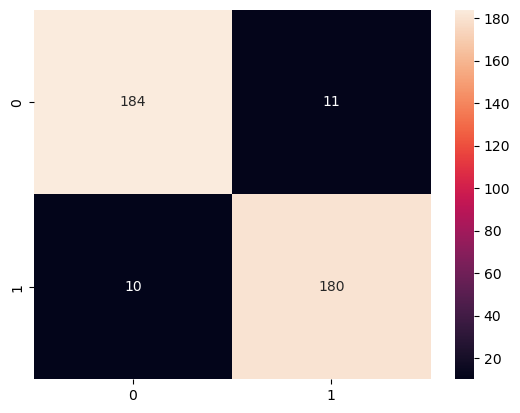

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Print classification report


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95       195
           2       0.94      0.95      0.94       190

    accuracy                           0.95       385
   macro avg       0.95      0.95      0.95       385
weighted avg       0.95      0.95      0.95       385

